# **模型訓練（分類問題）**
此份程式碼會講解針對分類型任務在模型訓練上需要注意的細節。

## 本章節內容大綱
* ### 二元分類問題
    * ### [創建資料集／載入資料集（Dataset Creating/ Loading）](#DatasetCreating/Loading)
    * ### [資料前處理（Data Preprocessing）](#DataPreprocessing)
    * ### [模型建置（Model Building）](#ModelBuilding)
    * ### [模型訓練（Model Training）](#ModelTraining)
    * ### [模型評估（Model Evaluation）](#ModelEvaluation)
* ### 多元分類問題
---

## 匯入套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tensorflow 相關套件
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

<a name="DatasetCreating/Loading"></a>
## 創建資料集／載入資料集（Dataset Creating / Loading）

In [2]:
# 上傳資料
!wget -q https://github.com/TA-aiacademy/course_3.0/releases/download/DL/Data_part2.zip
!unzip -q Data_part2.zip

In [3]:
train_df = pd.read_csv('./Data/FilmComment_train.csv')
test_df = pd.read_csv('./Data/FilmComment_test.csv')

In [4]:
train_df.head()

,<skip>,the,and,a,of,to,is,br,in,it,...,punchline,culminating,talentless,grabbing,soulless,unfairly,grail,retrospect,edged,y_label
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


* #### 電影評論資料集
訓練集，測試集分別為 6250，2500 筆，9997 種常用字詞，若在同一則評論中出現該字詞為 1，若否則為 0，y_label 標記評價正面與否。

In [5]:
X_df = train_df.iloc[:, :-1].values
y_df = train_df.y_label.values

In [6]:
X_test = test_df.iloc[:, :-1].values
y_test = test_df.y_label.values

<a name="DataPreprocessing"></a>
## 資料前處理（Data Preprocessing）

* ### 資料正規化（Data Normalization）
由於此資料集的數值範圍都介於 0-1，並且皆是以相同意義轉換特徵值，因此也可以使用原始的數值作為訓練資料。

* ### 資料切分（Data Splitting）

In [7]:
# train, valid/test dataset split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
    train_test_split(X_df, y_df, test_size=0.1, random_state=17)

In [8]:
print(f'X_train shape: {X_train.shape}')
print(f'X_valid shape: {X_valid.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_valid shape: {y_valid.shape}')

X_train shape: (5625, 9997)
X_valid shape: (625, 9997)
y_train shape: (5625,)
y_valid shape: (625,)


<a name="ModelBuilding"></a>
## 模型建置（Model Building）

In [9]:
keras.backend.clear_session()  # 重置 keras 的所有狀態
tf.random.set_seed(17)  # 設定 tensorflow 隨機種子

model = keras.models.Sequential()
model.add(layers.Dense(16,  # 神經元個數
                       input_shape=X_train[0].shape,  # 輸入形狀
                       activation='relu'))  # 激活函數
model.add(layers.Dense(16,
                       activation='relu'))
model.add(layers.Dense(1,
                       activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                159968    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,257
Trainable params: 160,257
Non-trainable params: 0
_________________________________________________________________


![](https://i.imgur.com/75GQ9gz.png)

## 模型訓練（Model training）

* ### 模型編譯（model compile）
設定模型訓練時，所需的優化器 (optimizer)、損失函數 (loss function)、評估指標 (metrics)

In [10]:
model.compile(optimizer='rmsprop',  # default: RMSprop(learning_rate=0.001)
              loss='binary_crossentropy',  # 針對二元分類問題的損失函數
              metrics='acc')  # 評估指標: 準確率

![](https://i.imgur.com/GazyxvF.png)

In [11]:
history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
11/11 [==============================] - 2s 91ms/step - loss: 0.6230 - acc: 0.6903 - val_loss: 0.5471 - val_acc: 0.7936
Epoch 2/20
11/11 [==============================] - 1s 64ms/step - loss: 0.4577 - acc: 0.8684 - val_loss: 0.4550 - val_acc: 0.8512
Epoch 3/20
11/11 [==============================] - 1s 64ms/step - loss: 0.3636 - acc: 0.9036 - val_loss: 0.4005 - val_acc: 0.8592
Epoch 4/20
11/11 [==============================] - 1s 62ms/step - loss: 0.2891 - acc: 0.9326 - val_loss: 0.3681 - val_acc: 0.8688
Epoch 5/20
11/11 [==============================] - 1s 63ms/step - loss: 0.2392 - acc: 0.9461 - val_loss: 0.3466 - val_acc: 0.8704
Epoch 6/20
11/11 [==============================] - 1s 64ms/step - loss: 0.1997 - acc: 0.9586 - val_loss: 0.3323 - val_acc: 0.8736
Epoch 7/20
11/11 [==============================] - 1s 66ms/step - loss: 0.1650 - acc: 0.9675 - val_loss: 0.3242 - val_acc: 0.8752
Epoch 8/20
11/11 [==============================] - 1s 64ms/step - loss: 0.1411 - a

<a name="ModelEvaluation"></a>
## 模型評估（Model Evaluation）

* ### 視覺化訓練過程的評估指標 （Visualization）

In [12]:
# type(history.history) = dictionary
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [13]:
train_loss = history.history['loss']
train_acc = history.history['acc']

valid_loss = history.history['val_loss']
valid_acc = history.history['val_acc']

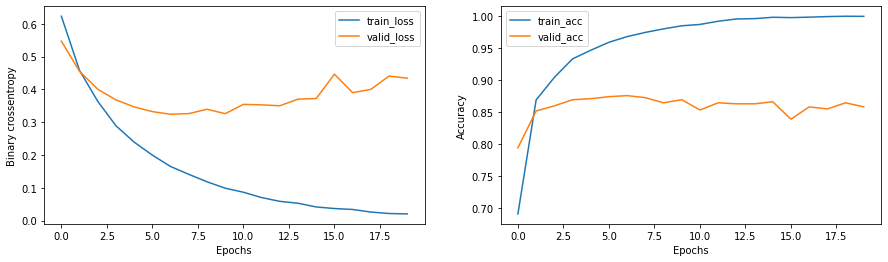

In [14]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(train_loss)), train_loss, label='train_loss')
plt.plot(range(len(valid_loss)), valid_loss, label='valid_loss')
plt.xlabel('Epochs')
plt.ylabel('Binary crossentropy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(train_acc)), train_acc, label='train_acc')
plt.plot(range(len(valid_acc)), valid_acc, label='valid_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

* ### 模型預測（Model predictions）

In [15]:
# predict all test data
pred = model(X_test)
print(pred)

tf.Tensor(
[[0.99701065]
 [0.10741324]
 [0.02380413]
 ...
 [0.99988586]
 [0.00874441]
 [0.9999656 ]], shape=(2500, 1), dtype=float32)


In [16]:
# use threshold to obtain binary class
pred_class = model(X_test) > 0.5
print(tf.cast(pred_class, tf.int32))

tf.Tensor(
[[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [1]], shape=(2500, 1), dtype=int32)


* ### 視覺化結果

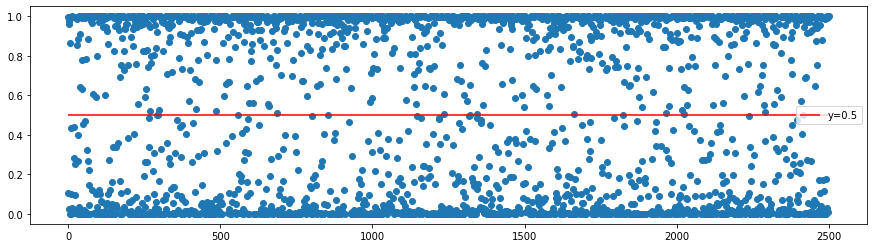

In [17]:
plt.figure(figsize=(15, 4))
plt.scatter(range(pred.shape[0]), pred)
plt.hlines(0.5, 0, pred.shape[0], colors='red', label='y=0.5')
plt.legend()

----------------
此範例是二元分類，y 的表示方式可用一維陣列，分別以 0, 1 表示兩個類別（正面，負面評價）
![](https://i.imgur.com/QYp5PVQ.png)

**若是多元分類又該如何表示？**以多個維度的 One-Hot Encoding 方式表示多元分類標籤
![](https://i.imgur.com/vJcdRBj.png)

**對訓練有何影響？**
跟 y 最直接相關的就是 Loss function，間接影響到模型輸出的維度
![](https://i.imgur.com/gbEMjDl.png)

----------------------------

## 多元分類（Multi-class classification）

### 創建資料集／載入資料集（Dataset Creating / Loading）

In [18]:
train_df = pd.read_csv('./Data/FilmComment_train.csv')
test_df = pd.read_csv('./Data/FilmComment_test.csv')

In [19]:
X_df = train_df.iloc[:, :-1].values
y_df = train_df.y_label.values

In [20]:
X_test = test_df.iloc[:, :-1].values
y_test = test_df.y_label.values

<a name="DataPreprocessing"></a>
## 資料前處理（Data Preprocessing）

* #### One-Hot encoding

In [21]:
# Convert to One-Hot encoding
y_df = keras.utils.to_categorical(y_df)
y_test = keras.utils.to_categorical(y_test)

In [22]:
# train, valid/test dataset split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
    train_test_split(X_df, y_df, test_size=0.1, random_state=17)

In [23]:
print(f'X_train shape: {X_train.shape}')
print(f'X_valid shape: {X_valid.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_valid shape: {y_valid.shape}')

X_train shape: (5625, 9997)
X_valid shape: (625, 9997)
y_train shape: (5625, 2)
y_valid shape: (625, 2)


### 模型建置（Model Building）

In [24]:
keras.backend.clear_session()
tf.random.set_seed(17)

model = keras.models.Sequential()
model.add(layers.Dense(16,
                        input_shape=X_train[0].shape,
                        activation='relu'))
model.add(layers.Dense(16,
                       activation='relu'))
model.add(layers.Dense(2,
                       activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                159968    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 160,274
Trainable params: 160,274
Non-trainable params: 0
_________________________________________________________________


### 模型訓練（Model training）

* #### 模型編譯（model compile）
設定模型訓練時，所需的優化器 (optimizer)、損失函數 (loss function)

In [25]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='acc')

In [26]:
history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
11/11 [==============================] - 2s 86ms/step - loss: 0.6422 - acc: 0.7003 - val_loss: 0.5669 - val_acc: 0.8240
Epoch 2/20
11/11 [==============================] - 1s 67ms/step - loss: 0.4952 - acc: 0.8622 - val_loss: 0.4768 - val_acc: 0.8352
Epoch 3/20
11/11 [==============================] - 1s 88ms/step - loss: 0.3936 - acc: 0.8882 - val_loss: 0.4051 - val_acc: 0.8736
Epoch 4/20
11/11 [==============================] - 1s 107ms/step - loss: 0.3110 - acc: 0.9131 - val_loss: 0.3655 - val_acc: 0.8688
Epoch 5/20
11/11 [==============================] - 1s 101ms/step - loss: 0.2494 - acc: 0.9381 - val_loss: 0.3415 - val_acc: 0.8720
Epoch 6/20
11/11 [==============================] - 1s 63ms/step - loss: 0.2062 - acc: 0.9516 - val_loss: 0.3255 - val_acc: 0.8784
Epoch 7/20
11/11 [==============================] - 1s 62ms/step - loss: 0.1689 - acc: 0.9625 - val_loss: 0.3170 - val_acc: 0.8784
Epoch 8/20
11/11 [==============================] - 1s 63ms/step - loss: 0.1419 -

### 模型評估（Model evalutation）

* #### 視覺化訓練過程的評估指標 （Visualization）

In [27]:
# type(history.history) = dictionary
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [28]:
train_loss = history.history['loss']
train_acc = history.history['acc']

valid_loss = history.history['val_loss']
valid_acc = history.history['val_acc']

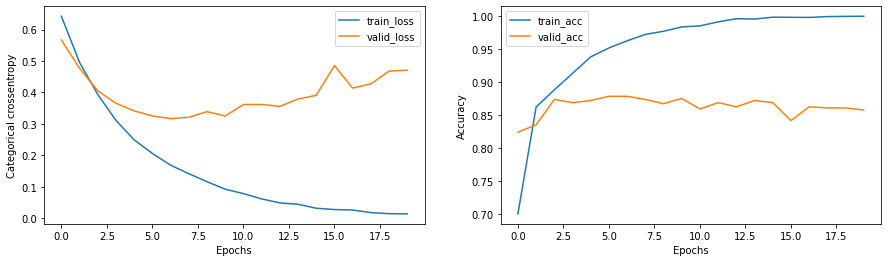

In [29]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(train_loss)), train_loss, label='train_loss')
plt.plot(range(len(valid_loss)), valid_loss, label='valid_loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical crossentropy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(train_acc)), train_acc, label='train_acc')
plt.plot(range(len(valid_acc)), valid_acc, label='valid_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

* ### 模型預測（Model predictions）

In [30]:
# predict all test data
pred = model(X_test)
print(pred)

tf.Tensor(
[[2.4007210e-03 9.9759924e-01]
 [9.4380546e-01 5.6194581e-02]
 [9.9147528e-01 8.5247289e-03]
 ...
 [1.4861810e-04 9.9985135e-01]
 [9.9814713e-01 1.8528955e-03]
 [3.2510412e-05 9.9996746e-01]], shape=(2500, 2), dtype=float32)


In [31]:
pred = tf.argmax(model(X_test), axis=-1)  # choose maximum probability of index
print(pred)

tf.Tensor([1 0 0 ... 1 0 1], shape=(2500,), dtype=int64)


---
### Remark
**Classification task**
![](https://i.imgur.com/vva88Jj.png)

### Quiz
請試著利用 Data/pkgo_train.csv 做多元分類問題，預測五個種類的 pokemon，並調整模型（網路層數、神經元數目）得到更高的準確度。

pkgo_train 為 Pokemon go 中 pokemon 出沒狀態描述的資料集，欄位說明如下：
* latitude, longitude: 位置（經緯度）
* local.xx: 時間（擷取格式 mm-dd'T'hh-mm-ss.ms'Z'）
* appearedTimeOfDay: night, evening, afternoon, morning 四種時段
* appearedHour/Minute: 當地小時／分鐘
* appearedDayOfWeek: Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday
* appearedDay/Month: 當地日期／月份
* terrainType: 地形種類
* closeToWater: 是否接近水源（100 公尺內）
* city: 城市
* continent: 洲別
* weather: 天氣種類（Foggy Clear, PartlyCloudy, MostlyCloudy, Overcast, Rain, BreezyandOvercast, LightRain, Drizzle, BreezyandPartlyCloudy, HeavyRain, BreezyandMostlyCloudy, Breezy, Windy, WindyandFoggy, Humid, Dry, WindyandPartlyCloudy, DryandMostlyCloudy, DryandPartlyCloudy, DrizzleandBreezy, LightRainandBreezy, HumidandPartlyCloudy, HumidandOvercast, RainandWindy）
* temperature: 攝氏溫度
* windSpeed: 風速（km/h）
* windBearing: 風向
* pressure: 氣壓
* sunrise/sunsetXX: 日出日落相關訊息
* population_density: 人口密集度
* urban/suburban/midurban/rural: 出沒過的地點城市程度（人口密集度小於 200 為 rural, 大於等於 200 且小於 400 為 midUrban, 大於等於400 且小於 800 為 subUrban, 大於 800 為 urban）
* gymDistanceKm: 最近道館的距離
* gymInxx: 道館是否在指定距離內
* cooc1-cooc151: 是否有其他 pokemon 在 24 小時內，出現在周圍 100 公尺之內
* category: 種類